In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import numpy as np
import datetime
import pickle
#nltk.download('vader_lexicon')
plt.style.use('fivethirtyeight')

In [2]:
sid = SentimentIntensityAnalyzer()

In [14]:
with open('../data/clean/twitter_data.pkl', 'rb') as f:
    data = pickle.load(f)
    data.reset_index(drop=True, inplace=True)

In [15]:
data

,created_at,id,full_text,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_screen_name,quoted_status_id,quoted_status_id_str,...,extended_entities,hashtags,location,screen_name,name,description,acct_created_date,followers_count,friends_count,verified
0,2020-09-29 23:59:56+00:00,1311093385688735744,Biden a professional debater?? Hardly!! More ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,1.311081e+18,1311081374510710784,...,NaN,None,America,sfshores53,SharonS,Conservative/#MAGA/ #WWG1WGA /MbrNRA/#Trump202...,2010-02-27 00:36:23+00:00,4065,4998,False
1,2020-09-30 00:00:02+00:00,1311093410737070086,RT @abbydphillip: Very reminiscent of pre-2018...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,1.311075e+18,1311075316996157441,...,NaN,None,"New York, NY",grace_panetta,Grace Panetta,Politics reporter covering elections & voting ...,2009-11-07 16:57:16+00:00,21737,1718,True
2,2020-09-30 00:00:04+00:00,1311093419100561408,RT @RudyGiuliani: Why was Corrupt Biden’s son ...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,NaN,NaN,...,NaN,None,Kentucky/Florida,susuclarkson,SuSu Clarkson,"wife, mother, grandmother, southerner, conserv...",2009-06-03 04:44:06+00:00,893,2356,False
3,2020-09-30 00:00:06+00:00,1311093427434446853,"RT @KamalaHarris: At 9pm ET tonight, @JoeBiden...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,NaN,NaN,...,NaN,None,"Portland, OR",thetashadanner,Tasha Danner,Political science nerd | Lover of this planet ...,2017-01-26 17:52:05+00:00,217,660,False
4,2020-09-30 00:00:10+00:00,1311093442592743424,RT @realDonaldTrump: Thank you #Truckers4Trump...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,NaN,NaN,...,"{'media': [{'id': 1310422596324913152, 'id_str...",Truckers4Trump,"California, USA",bertb71,BRONCO BERT,one of the broncos biggest fan ever,2017-12-24 22:30:21+00:00,61,63,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66332,2020-10-02 23:59:06+00:00,1312180339821875201,RT @Variety: Twitter to Suspend Users Wishing ...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,NaN,NaN,...,NaN,None,"Vancouver Island, BC",MarshWatching,MarshWatching,Artist. Idealist. Student of History. Guided b...,2017-01-15 01:45:04+00:00,843,1662,False
66333,2020-10-02 23:59:08+00:00,1312180348076187649,RT @MollyMerry1: @robreiner I think it would b...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,NaN,NaN,...,NaN,None,UNITED STATES,Chriscatty,ChrisSY,PRESIDENT TRUMP SUCKS- ORANGE FACE,2009-05-14 03:36:09+00:00,193,300,False
66334,2020-10-02 23:59:27+00:00,1312180427755458560,"@ScottAdamsSays Hi, my son died, please vote J...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.312111e+18,1312110697946386432,2.853462e+09,ScottAdamsSays,NaN,NaN,...,NaN,None,decentralized,tidoodoo,Tidoodoo,Connecting with you\nThank you ^-^\n\n🌎🇫🇷🐸1️⃣7️⃣,2019-01-04 10:19:24+00:00,382,1329,False
66335,2020-10-02 23:59:41+00:00,1312180486840619008,RT @aaronjcarpenter: I can’t stress this enoug...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,NaN,NaN,...,NaN,None,New Hampshire,RuthieRedSox,RuthieRedSox,Retired Navy Pilot & proud Naval Academy gradu...,2013-10-03 15:09:39+00:00,67360,3197,False


In [16]:
def remove_pattern(input_txt, pattern):
    if type(input_txt) is float:
        print(input_txt)
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [17]:
clean = clean_tweets(data['full_text'])
data['clean_text'] = clean

In [21]:
pos = []
neu = []
neg = []
com = []
biden = []
trump = []
for i in range(data.shape[0]):
    score = sid.polarity_scores(data['clean_text'][i])
    pos.append(score['pos'])
    neu.append(score['neu'])
    neg.append(score['neg'])
    com.append(score['compound'])
    
    biden.append(True if 'biden' in data['full_text'][i].lower() else False)
    trump.append(True if 'trump' in data['full_text'][i].lower() else False)
    

In [22]:
data['pos'] = pos
data['neu'] = neu
data['neg'] = neg
data['com'] = com
data['biden'] = biden
data['trump'] = trump

In [25]:
biden_tweets = data[data['biden']]
trump_tweets = data[data['trump']]

In [56]:
intervals = pd.date_range(start='2020-09-30', end='2020-10-03', freq='1H', tz='UTC')
tweet_time = datetime.datetime(2020, 10, 2, 4, 54)
hope_hicks = datetime.datetime(2020, 10, 2, 2, 44)
hospital_tweet = datetime.datetime(2020, 10, 2, 22, 16)

In [33]:
biden_avg = []
trump_avg = []
for i in range(len(intervals)):
    start = i - 1
    end = i + 1
    
    if i == 0: start = i
    if i == len(intervals) - 1: end = i
        
    biden_set = biden_tweets[(biden_tweets['created_at'] > intervals[start]) & 
                             (biden_tweets['created_at'] < intervals[end])]
    
    trump_set = trump_tweets[(trump_tweets['created_at'] > intervals[start]) &
                             (trump_tweets['created_at'] < intervals[end])]
    
    biden_avg.append(biden_set['com'].mean())
    trump_avg.append(trump_set['com'].mean())

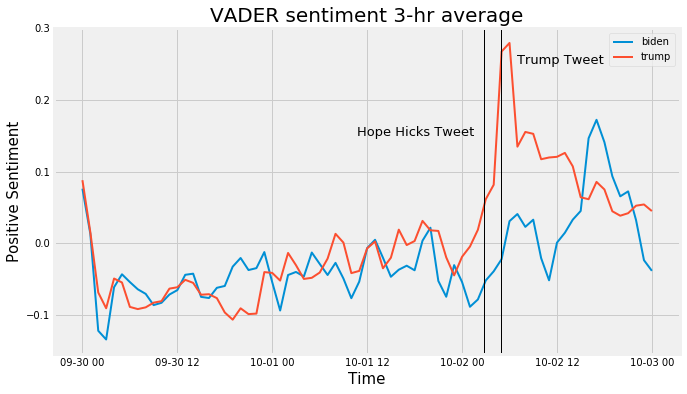

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(intervals, biden_avg, linewidth=2, label='biden')
ax.plot(intervals, trump_avg, linewidth=2, label='trump')
ax.axvline(tweet_time, -.1, 1, linewidth=1, color='black')
ax.axvline(hope_hicks, -.1, 1, linewidth=1, color='black')
#ax.axvline(hospital_tweet, -.1, 1, linewidth=1, color='black')
ax.text(tweet_time + datetime.timedelta(hours=2), 0.25, 'Trump Tweet', fontsize=13)
ax.text(hope_hicks - datetime.timedelta(hours=16), 0.15, 'Hope Hicks Tweet', fontsize=13)
ax.set_title('VADER sentiment 3-hr average', fontsize=20)
ax.set_ylabel('Positive Sentiment', fontsize=15)
ax.set_xlabel('Time', fontsize=15)
ax.legend()

In [81]:

biden_tweets = data[data['biden']]
trump_tweets = data[data['trump']]

In [82]:
biden_tweets = biden_tweets[~((biden_tweets['neu'] == 1) & (biden_tweets['com'] == 0))]
trump_tweets = trump_tweets[~((trump_tweets['neu'] == 1) & (trump_tweets['com'] == 0))]

In [96]:
intervals = pd.date_range(start='2020-09-30', end='2020-10-03', freq='1H', tz='UTC')
tweet_time = datetime.datetime(2020, 10, 2, 4, 54)
hope_hicks = datetime.datetime(2020, 10, 2, 2, 44, tzinfo=datetime.timezone.utc)
hospital_tweet = datetime.datetime(2020, 10, 2, 22, 16)

In [85]:
biden_avg = []
trump_avg = []
for i in range(len(intervals)):
    start = i - 1
    end = i + 1
    
    if i == 0: start = i
    if i == len(intervals) - 1: end = i
        
    biden_set = biden_tweets[(biden_tweets['created_at'] > intervals[start]) & 
                             (biden_tweets['created_at'] < intervals[end])]
    
    trump_set = trump_tweets[(trump_tweets['created_at'] > intervals[start]) &
                             (trump_tweets['created_at'] < intervals[end])]
    
    biden_avg.append(biden_set['com'].mean())
    trump_avg.append(trump_set['com'].mean())

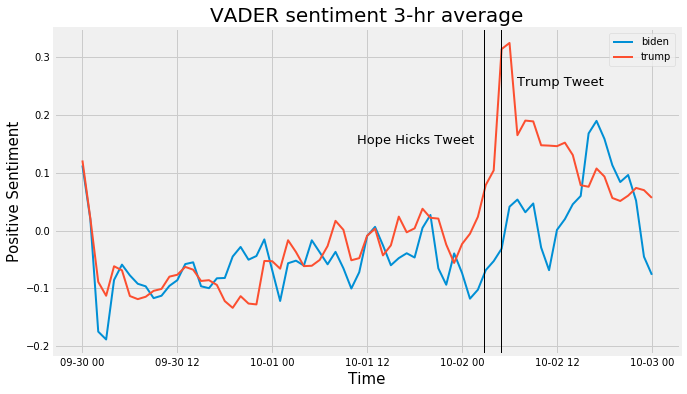

In [88]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(intervals, biden_avg, linewidth=2, label='biden')
ax.plot(intervals, trump_avg, linewidth=2, label='trump')
ax.axvline(tweet_time, -.1, 1, linewidth=1, color='black')
ax.axvline(hope_hicks, -.1, 1, linewidth=1, color='black')
#ax.axvline(hospital_tweet, -.1, 1, linewidth=1, color='black')
ax.text(tweet_time + datetime.timedelta(hours=2), 0.25, 'Trump Tweet', fontsize=13)
ax.text(hope_hicks - datetime.timedelta(hours=16), 0.15, 'Hope Hicks Tweet', fontsize=13)
ax.set_title('VADER sentiment 3-hr average', fontsize=20)
ax.set_ylabel('Positive Sentiment', fontsize=15)
ax.set_xlabel('Time', fontsize=15)
ax.legend()

In [103]:
import scipy.stats as scs



In [99]:
biden_before_hicks = biden_tweets[biden_tweets['created_at'] < hope_hicks]
biden_after_hicks = biden_tweets[biden_tweets['created_at'] >= hope_hicks]

trump_before_hicks = trump_tweets[trump_tweets['created_at'] < hope_hicks]
trump_after_hicks = trump_tweets[trump_tweets['created_at'] >= hope_hicks]

Hypothesis Test: Hope Hicks (and subsequently Trump) getting COVID positively impacted sentiment around Joe Biden and Donald Trump

H_nought: mu_trump_before = mu_trump_after
          mu_biden_before = mu_biden_after
          
H_alt: mu_trump_before < mu_trump_after
       mu_biden_efore < mu_biden_after


In [139]:
print('Sample Sizes')
print('===================')
print('Biden Before: %i' % (biden_before_hicks.shape[0]))
print('Biden After : %i' % (biden_after_hicks.shape[0]))
print('-------------------')
print('Trump Before: %i' % (trump_before_hicks.shape[0]))
print('Trump After : %i' % (trump_after_hicks.shape[0]))

Sample Sizes
Biden Before: 11226
Biden After : 2799
-------------------
Trump Before: 19542
Trump After : 10669


In [142]:
print('Candidate | Before Sentiment (avg) | After Sentiment (avg)')
print('==========|========================|======================')
print('  Biden   |         %0.2f          |         %0.2f        ' % 
      (biden_before_hicks['com'].mean(), biden_after_hicks['com'].mean()))
print('  Trump   |         %0.2f          |         %0.2f        ' % 
      (trump_before_hicks['com'].mean(), trump_after_hicks['com'].mean()))

Candidate | Before Sentiment (avg) | After Sentiment (avg)
==========|========================|======================
  Biden   |         -0.07          |         0.07        
  Trump   |         -0.05          |         0.15        


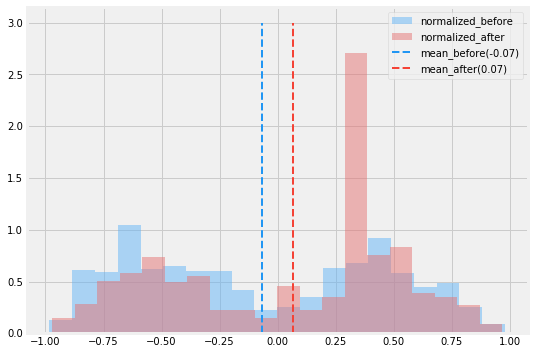

In [144]:
fig, ax = plt.subplots(figsize=(8,6))

mean_before = biden_before_hicks['com'].mean()
mean_after = biden_after_hicks['com'].mean()

ax.hist(biden_before_hicks['com'], label='normalized_before', normed=1, alpha=0.5, bins=20, color='#64b5f6')
ax.hist(biden_after_hicks['com'], label='normalized_after', normed=1, alpha=0.5, bins=20, color='#e57373')
ax.vlines(mean_before, 0, 3, label='mean_before(%0.2f)' % mean_before, linestyle='--', linewidth=2, color='#2196f3')
ax.vlines(mean_after, 0, 3, label='mean_after(%0.2f)' % mean_after, linestyle='--', linewidth=2, color='#f44336')
ax.legend()

In [127]:
t_stat, p_val = scs.ttest_ind(biden_before_hicks['com'], biden_after_hicks['com'], equal_var=False)
print(p_val)

3.56061905176781e-36


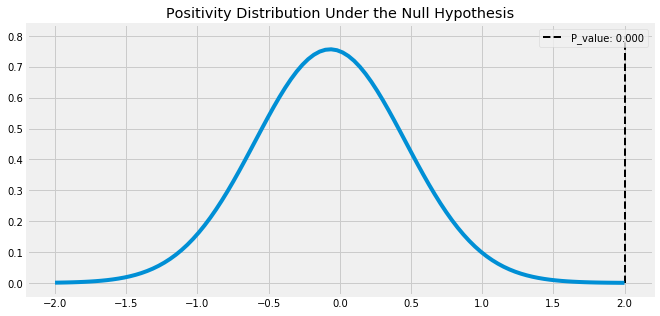

In [135]:
dist_m = scs.norm(np.mean(biden_before_hicks['com']), np.std(biden_before_hicks['com']))
y = dist_m.ppf(1 - p_val)
if y == float('inf'):
    y=2
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-2, 2, 100)
ax.plot(x, dist_m.pdf(x))
ax.vlines(y, 0, 0.8, linestyle='dashed', linewidth=2, label='P_value: %.3f' % p_val)
ax.set_title('Positivity Distribution Under the Null Hypothesis')
ax.legend();

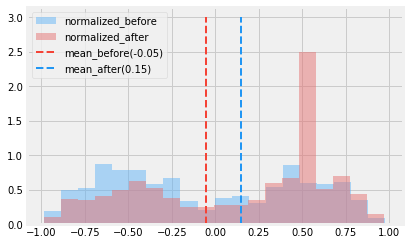

In [125]:
fig, ax = plt.subplots()

mean_before = trump_before_hicks['com'].mean()
mean_after = trump_after_hicks['com'].mean()

ax.hist(trump_before_hicks['com'], label='normalized_before', normed=1, alpha=0.5, bins=20, color='#64b5f6')
ax.hist(trump_after_hicks['com'], label='normalized_after', normed=1, alpha=0.5, bins=20, color='#e57373')
ax.vlines(mean_before, 0, 3, label='mean_before(%0.2f)' % mean_before, linestyle='--', linewidth=2, color='#f44336')
ax.vlines(mean_after, 0, 3, label='mean_after(%0.2f)' % mean_after, linestyle='--', linewidth=2, color='#2196f3')
ax.legend()

In [140]:
t_stat, p_val = scs.ttest_ind(trump_before_hicks['com'], trump_after_hicks['com'])
print(p_val)

1.078107741599376e-205


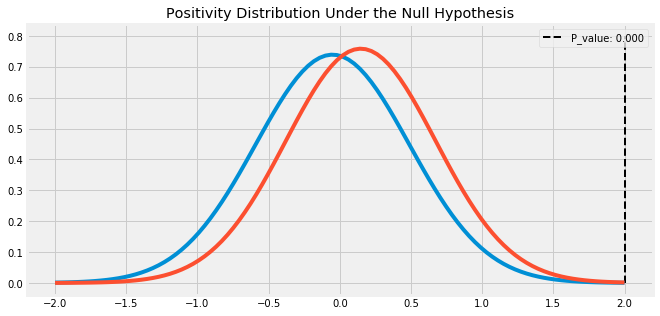

In [148]:
dist_0 = scs.norm(np.mean(trump_before_hicks['com']), np.std(trump_before_hicks['com']))
y = dist_m.ppf(1 - p_val)
if y == float('inf'):
    y=2
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-2, 2, 100)
ax.plot(x, dist_0.pdf(x))
dist_a = scs.norm(np.mean(trump_after_hicks['com']), np.std(trump_after_hicks['com']))
ax.plot(x, dist_a.pdf(x))
ax.vlines(y, 0, 0.8, linestyle='dashed', linewidth=2, label='P_value: %.3f' % p_val)
ax.set_title('Positivity Distribution Under the Null Hypothesis')
ax.legend();

In [151]:
rt = dist_0.ppf(.05)
beta = dist_a.cdf(rt)
power = 1 - beta

In [152]:
power

0.9805628281872574

In [161]:
biden_debate = biden_tweets[biden_tweets.clean_text.apply(lambda s: 'debate' in s.lower())]
trump_debate = trump_tweets[trump_tweets.clean_text.apply(lambda s: 'debate' in s.lower())]

In [ ]:
intervals = pd.date_range(start='2020-09-30', end='2020-10-03', freq='1H', tz='UTC')

In [163]:
biden_avg = []
trump_avg = []
for i in range(len(intervals)):
    start = i - 1
    end = i + 1
    
    if i == 0: start = i
    if i == len(intervals) - 1: end = i
        
    biden_set = biden_debate[(biden_debate['created_at'] > intervals[start]) & 
                             (biden_debate['created_at'] < intervals[end])]
    
    trump_set = trump_debate[(trump_debate['created_at'] > intervals[start]) &
                             (trump_debate['created_at'] < intervals[end])]
    
    biden_avg.append(biden_set['com'].mean())
    trump_avg.append(trump_set['com'].mean())

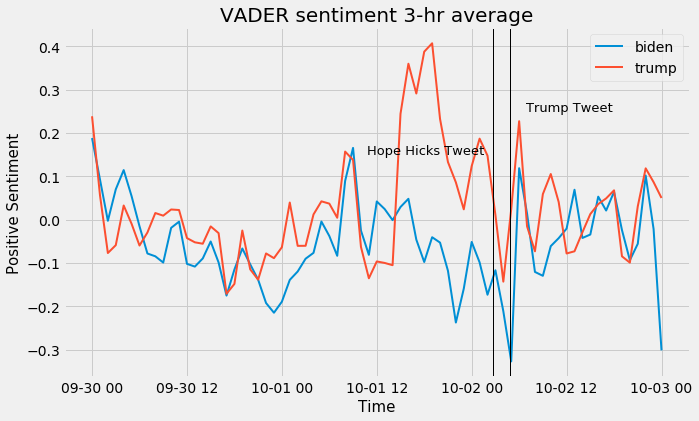

In [164]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(intervals, biden_avg, linewidth=2, label='biden')
ax.plot(intervals, trump_avg, linewidth=2, label='trump')
ax.axvline(tweet_time, -.1, 1, linewidth=1, color='black')
ax.axvline(hope_hicks, -.1, 1, linewidth=1, color='black')
#ax.axvline(hospital_tweet, -.1, 1, linewidth=1, color='black')
ax.text(tweet_time + datetime.timedelta(hours=2), 0.25, 'Trump Tweet', fontsize=13)
ax.text(hope_hicks - datetime.timedelta(hours=16), 0.15, 'Hope Hicks Tweet', fontsize=13)
ax.set_title('VADER sentiment 3-hr average', fontsize=20)
ax.set_ylabel('Positive Sentiment', fontsize=15)
ax.set_xlabel('Time', fontsize=15)
ax.legend()

In [167]:
trump_debate[(trump_debate['created_at'] > datetime.datetime(2020, 10, 1, 12, tzinfo=datetime.timezone.utc)) &
            (trump_debate['created_at'] < datetime.datetime(2020, 10, 2, tzinfo=datetime.timezone.utc))]


,created_at,id,full_text,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_screen_name,quoted_status_id,quoted_status_id_str,...,followers_count,friends_count,verified,clean_text,pos,neu,neg,com,biden,trump
32635,2020-10-01 12:01:21+00:00,1311637323872964608,Fun! ----Trump Biden Presidential Debate 1 - H...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,NaN,NaN,...,277,440,False,Fun! ----Trump Biden Presidential Debate 1 - H...,0.216,0.784,0.000,0.5562,True,True
32639,2020-10-01 12:01:38+00:00,1311637395008348167,RT @UncleSamsNation: Democrats are now talking...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,NaN,NaN,...,402,462,False,Democrats are now talking about cutting off #...,0.000,0.909,0.091,-0.1280,False,True
32645,2020-10-01 12:01:53+00:00,1311637458031915011,RT @CNNPolitics: Fact check: Almost every sing...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,NaN,NaN,...,2348,1989,False,Fact check: Almost every single one of Presid...,0.000,0.829,0.171,-0.4767,False,True
32646,2020-10-01 12:01:57+00:00,1311637471998996480,RT @paulkrugman: Suggestion for next debate: t...,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,NaN,NaN,...,3403,3994,False,Suggestion for next debate: the moderator sho...,0.094,0.735,0.171,-0.2263,False,True
32658,2020-10-01 12:03:22+00:00,1311637828573360135,RT @SamiaAliSalama: @JillWineBanks There is no...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,NaN,NaN,...,19558,20314,False,There is no point in having any more debates...,0.058,0.715,0.227,-0.5848,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43676,2020-10-01 23:54:38+00:00,1311816824594464768,RT @TrumpWarRoom: Not a great look for a debat...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,1.311761e+18,1311761390282125315,...,17828,19339,False,Not a great look for a debate moderator,0.000,0.603,0.397,-0.5096,False,True
43694,2020-10-01 23:55:43+00:00,1311817100101640193,@RepFredKeller Kind of like how you refuse to ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.311807e+18,1311807409791401985,1.136061e+18,RepFredKeller,NaN,NaN,...,2331,643,True,Kind of like how you refuse to address the fa...,0.241,0.676,0.083,0.4980,False,True
43703,2020-10-01 23:56:05+00:00,1311817192527278081,RT @DonaldJTrumpJr: 🚨🚨🚨 In other Shocking News...,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,NaN,NaN,...,1,114,False,🚨🚨🚨 In other Shocking News. \n\nModerator For...,0.000,0.870,0.130,-0.4019,True,True
43706,2020-10-01 23:56:13+00:00,1311817226991919104,"@realDonaldTrump Hahaha...no one, literally no...","<a href=""http://twitter.com/download/android"" ...",1.311686e+18,1311685923097260034,2.507388e+07,realDonaldTrump,NaN,NaN,...,1317,1552,False,"Hahaha...no one, literally no one is saying y...",0.263,0.592,0.145,0.4199,False,True
